In [12]:
import yfinance as yf
import pandas as pd 
import ta
import matplotlib.pyplot as plt 

In [479]:
ticker = "^MDAXI"
stock = yf.download(ticker, period = "5y")
stock.to_csv("stock1.csv")

[*********************100%***********************]  1 of 1 completed


In [480]:
window = 20
window_dev = 2
stock = pd.read_csv("stock.csv")
stock['r'] = stock['Close'].pct_change()
stock['upperbband'] = ta.volatility.bollinger_hband(close = stock['Close'], window = window, window_dev = window_dev)
stock['lowerbband'] = ta.volatility.bollinger_lband(close = stock['Close'], window = window, window_dev = window_dev)
stock['ma20'] = stock['Close'].rolling(20).mean()
stock['ma40'] = stock['Close'].rolling(40).mean()
stock['bbuy'] = ta.volatility.bollinger_lband_indicator(close = stock['Close'], window = window, window_dev = window_dev)
stock['buy'] = 0
for i in range(1, len(stock)):
    if stock.loc[i-1, 'bbuy'] == 1 and stock.loc[i, 'bbuy'] == 0:
        stock.loc[i, 'buy'] = 1
stock['sell'] = 0
for i in range(1, len(stock)):
    if stock.loc[i-1, 'Close'] < stock.loc[i, 'ma20'] and stock.loc[i, 'Close'] > stock.loc[i, 'ma20']:
        stock.loc[i, 'sell'] = 1
# stock['sell'] = ta.volatility.bollinger_hband_indicator(close = stock['Close'], window = window, window_dev = window_dev)
stock['hold'] = stock['buy'] - stock['sell']
for i in range(1, len(stock)):
    if stock.loc[i-1, 'hold'] == 1:
        if stock.loc[i, 'buy'] == 1:
            stock.loc[i, 'hold'] = 1
        elif stock.loc[i, 'sell'] == 1:
            stock.loc[i, 'hold'] = 0
        else: 
            stock.loc[i, 'hold'] = 1
    else:
        if stock.loc[i, 'buy'] ==1:
            stock.loc[i, 'hold'] = 1
        elif stock.loc[i, 'sell'] == 1:
            stock.loc[i, 'hold'] = 0
stock['hold_r'] = stock['hold']*stock['r']

r = stock['hold_r'].sum()
r1 = stock['r'].sum()

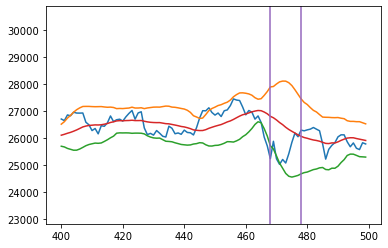

In [491]:
x = 500
y = stock.loc[x-50, 'Close']
stock['Close'][x-100:x].plot()
stock['upperbband'][x-100:x].plot()
stock['lowerbband'][x-100:x].plot()
stock['ma20'][x-100:x].plot()
stock['hold'] = stock['hold']*1.4*y
stock['hold'][x-100:x].plot()
axes = plt.gca()
axes.set_ylim([y*0.85, y*1.15])
plt.show()

In [482]:
stock.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume,r,upperbband,lowerbband,ma20,ma40,bbuy,buy,sell,hold,hold_r
1203,2021-01-08,31379.589844,31529.570312,31287.839844,31356.650391,31356.650391,47397000,0.004239,31545.662501,29176.264452,30360.963477,29653.486768,0.0,0,0,0.000000,0.000000
1204,2021-01-11,31322.779297,31398.289062,30943.599609,31102.199219,31102.199219,42489000,-0.008115,31613.389680,29253.371258,30433.380469,29731.421240,0.0,0,0,0.000000,-0.000000
1205,2021-01-12,31213.710938,31307.259766,31149.130859,31188.349609,31188.349609,39653000,0.002770,31673.577098,29349.923878,30511.750488,29800.909473,0.0,0,0,0.000000,0.000000
1206,2021-01-13,31168.609375,31376.150391,31093.419922,31308.300781,31308.300781,43509000,0.003846,31739.522754,29445.895215,30592.708984,29875.266504,0.0,0,0,0.000000,0.000000
1207,2021-01-14,31399.619141,31626.500000,31334.429688,31572.080078,31572.080078,43650000,0.008425,31819.925383,29561.850594,30690.887988,29951.744482,0.0,0,0,0.000000,0.000000
1208,2021-01-15,31485.939453,31485.939453,30855.279297,31035.919922,31035.919922,45744000,-0.016982,31803.122961,29709.486024,30756.304492,30009.339746,0.0,0,0,0.000000,-0.000000
1209,2021-01-18,30896.539062,31213.339844,30860.839844,31206.480469,31206.480469,31531700,0.005496,31783.358787,29875.509182,30829.433984,30073.234521,0.0,0,0,0.000000,0.000000
1210,2021-01-19,31395.119141,31440.880859,31262.759766,31290.460938,31290.460938,51032000,0.002691,31783.420384,30007.080592,30895.250488,30135.519775,0.0,0,0,0.000000,0.000000
1211,2021-01-20,31372.320312,31683.800781,31342.580078,31577.890625,31577.890625,37525000,0.009186,31840.219460,30087.553587,30963.886523,30206.329541,0.0,0,0,0.000000,0.000000
1212,2021-01-21,31722.279297,31905.109375,31674.519531,31748.970703,31748.970703,38571000,0.005418,31931.527545,30130.580658,31031.054102,30275.092041,0.0,0,0,0.000000,0.000000


In [483]:
r

0.39578594556445557

In [484]:
r1

0.54542339135173